# Week6 - Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()


,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

In [32]:
actual_distribution = results['actual'].value_counts(normalize=True)
print('distribution of actual', actual_distribution)

minority_class_percentage = actual_distribution.min()
majority_class_percentage = actual_distribution.max()

#class imbalance ratio is majority/minority class percentage
class_imbalance_ratio = majority_class_percentage / minority_class_percentage
print('class imbalance ratio', class_imbalance_ratio)

distribution of actual actual
1.0    0.6
0.0    0.4
Name: proportion, dtype: float64
class imbalance ratio 1.4999999999999998


If the ratio between majority and minority classes ,i.e., class imbalance ratio is more than 2 then there is a significant class imbalance. But here, we have it under the range so, there should be no problem about bias due to imbalance

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

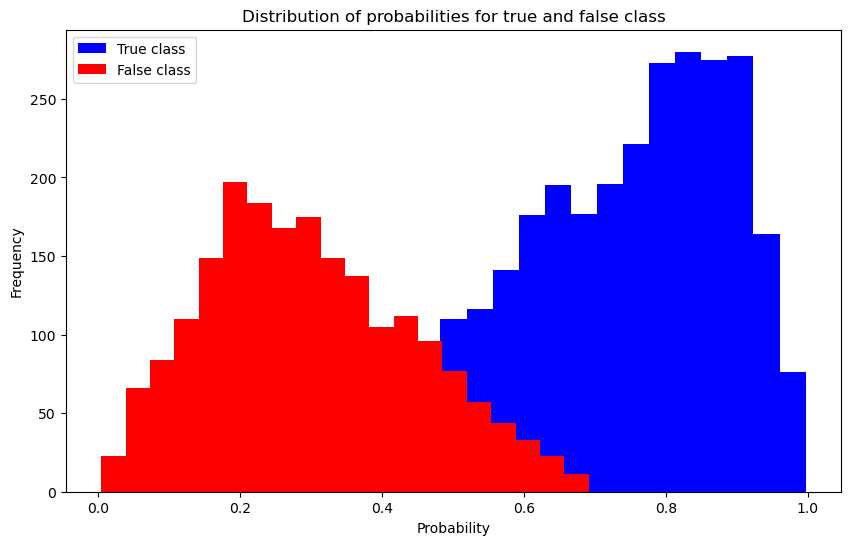

In [33]:
#histogram to show the distribution of probabilities for the True and False classes
true=results[results['actual']==1.0]
false=results[results['actual']==0.0]

plt.figure(figsize=(10,6))
plt.hist(true['prob'], bins=20, color='blue', label='True class')
plt.hist(false['prob'], bins=20, color='red', label='False class')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Distribution of probabilities for true and false class')
plt.legend()
plt.show()

There is a clear distinction between the two classes

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [34]:
threshold = 0.5

results['predicted'] = np.where(results['prob'] >= threshold, 1.0, 0.0)

true_positive = ((results['actual'] == 1.0) & (results['predicted'] == 1.0)).sum()
false_positive = ((results['actual'] == 0.0) & (results['predicted'] == 1.0)).sum()
true_negative = ((results['actual'] == 0.0) & (results['predicted'] == 0.0)).sum()
false_negative = ((results['actual'] == 1.0) & (results['predicted'] == 0.0)).sum()

confusion_matrix = np.array([[true_negative, false_positive], [false_negative, true_positive]])
print(confusion_matrix)

[[1790  210]
 [ 377 2623]]


The performance of our model is good because it predicts 88% of values correctly, in total it is predicting 4413 cases correctly and only 587 cases wrongly.

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [35]:
#accuracy
total_predictions=np.sum(confusion_matrix)
true_predictions=confusion_matrix[0,0]+confusion_matrix[1,1]
accuracy=true_predictions/total_predictions
print('Accuracy', accuracy)

#precision
true_positive=confusion_matrix[1,1]
predicted_positive=np.sum(confusion_matrix[:,1])
precision=true_positive/predicted_positive
print('Precision',precision)

#recall
actual_positive=np.sum(confusion_matrix[1,:])
recall=true_positive/actual_positive
print('Recall', recall)

Accuracy 0.8826
Precision 0.9258736321920226
Recall 0.8743333333333333


I would choose F1 score because it uses both false positives and false negatives which is very important when dealing with imbalanced dataset. Accuracy can be misleading because it uses the majority class, precision focuses on false positive only and recall on false negatives only

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

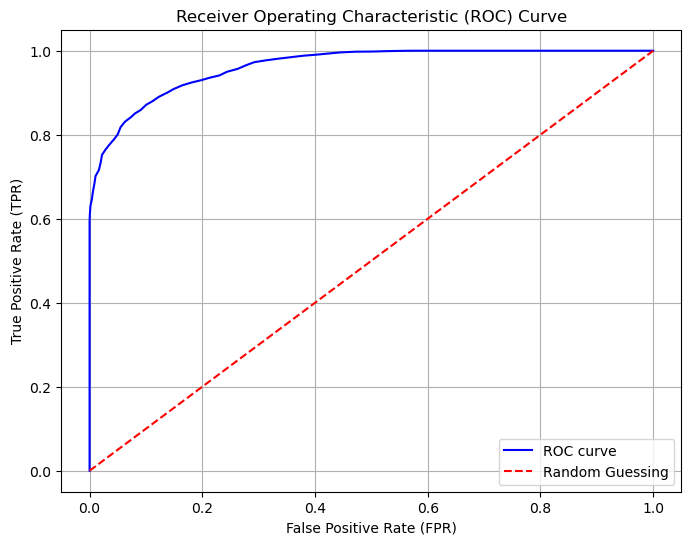

In [36]:
positives = results[results['actual'] == 1]
negatives = results[results['actual'] == 0]
total_positives=len(true)
total_negatives=len(false)
tpr_values=[]
fpr_values=[]

#iterating over thresholds to calculate TPR and FPR
for threshold in np.linspace(0, 1, 100):
    true_positives=sum(positives['prob']>=threshold)
    false_positives=sum(negatives['prob']>=threshold)
    
    #true positive rate (TPR) and false positive rate (FPR)
    tpr=true_positives/total_positives
    fpr=false_positives/total_negatives
    tpr_values.append(tpr)
    fpr_values.append(fpr)

#plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_values,tpr_values,color='blue',label='ROC curve')
plt.plot([0, 1],[0, 1],color='red',linestyle='--',label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

The model is performing better than random guessing, also it is significant in the curve that the true positive rate is higher than the false negative rate.